## **Section 1 - Module & Library Imports**

In [ ]:
# Install the tensorflow addons package,
# which has a nice image rotation function
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.8 MB/s eta 0:00:00


In [ ]:
# Module imports
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense
from tensorflow.keras import models, layers, optimizers, losses
from tensorflow._api.v2.data import AUTOTUNE
import tensorflow_datasets as tfds
import tensorflow_addons as tfa
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_ds

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
val_ds

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
## Ploting the Original & Reconstructed Image
## Defining plot with figure size,background color & plot title
#n = 10  
#plt.figure(figsize=(30, 8))
##plt.rcParams['axes.facecolor'] = 'black'
#plt.suptitle("Fig:4-Training Dataset", fontsize="x-large",color='black')

## Unbactching the tuple image dataset for the correct ploting format
#test_ds1 = train_ds.unbatch().take(25)
#test_ds1 = [image for image in test_ds1]

## Iterating over both original & VAE model reconstructed images
#for i in range(n):
    ## display original image
    #ax = plt.subplot(3, n, i + 1)
    #plt.imshow(test_ds1[i][0])
    #plt.gray()
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)

# Section 4 - Model Definitions

In [ ]:
# New Optimised Model Definition


def cnn_model():
    model = Sequential([
    layers.Input(shape=IMG_SIZE+(3,), name='Input'),
    layers.Conv2D(16,(4,4), padding='same', activation='relu',
                    name='Conv_1'),
    layers.MaxPooling2D((2, 2),name='Pool_1'), 
    layers.Conv2D(32,(4,4), padding='same', activation='relu',
                    name='Conv_2'),
    layers.MaxPooling2D((2, 2),name='Pool_2'), 
    layers.Conv2D(64,(3,3), padding='same', activation='relu',
                    name='Conv_3'),
    layers.MaxPooling2D((2, 2),name='Pool_3'), 
    layers.Conv2D(64,(3,3), padding='same', activation='relu',
                    name='Conv_4'),
    layers.MaxPooling2D((2, 2),name='Pool_4'), 
    layers.Conv2D(64,(3,3), padding='same', activation='relu',
                    name='Conv_5'),
    layers.MaxPooling2D((2, 2),name='Pool_5'),  
    layers.Flatten(name='Flatten'),
    layers.Dense(384, activation='relu', name='dense_1'),
    layers.Dense(1,activation='softmax', name='Output')
    ], name='CNN')
    return model 

In [ ]:
# Displaying Model Summary
model = cnn_model()

model.summary()

Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv_1 (Conv2D)             (None, 32, 32, 16)        784       
                                                                 
 Pool_1 (MaxPooling2D)       (None, 16, 16, 16)        0         
                                                                 
 Conv_2 (Conv2D)             (None, 16, 16, 32)        8224      
                                                                 
 Pool_2 (MaxPooling2D)       (None, 8, 8, 32)          0         
                                                                 
 Conv_3 (Conv2D)             (None, 8, 8, 64)          18496     
                                                                 
 Pool_3 (MaxPooling2D)       (None, 4, 4, 64)          0         
                                                                 
 Conv_4 (Conv2D)             (None, 4, 4, 64)          36928   

In [ ]:
# We have tried different optimizers including Adam & SGD. Both are evaluvated 
## based on different learning rates. From our trial & error we came to the 
### conlusion that, Optimizer Adam() with learning rate 1e-5 providing best model
#### performance

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# Setting up Binary classification loss
#loss_obj = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

loss_obj = tf.keras.losses.BinaryCrossentropy(from_logits=False)

# Accuracy metric
metrics = ['accuracy']

# Compiling the model with XLA JIT Compiler
model.compile(optimizer=opt,jit_compile=True,
              loss=loss_obj,
              metrics=metrics)

In [ ]:
# Training the model using FIT function & training parameters are stored on a
## history dictionary

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=EPOCHS)

In [ ]:
# Checking the common keys on the metrics history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

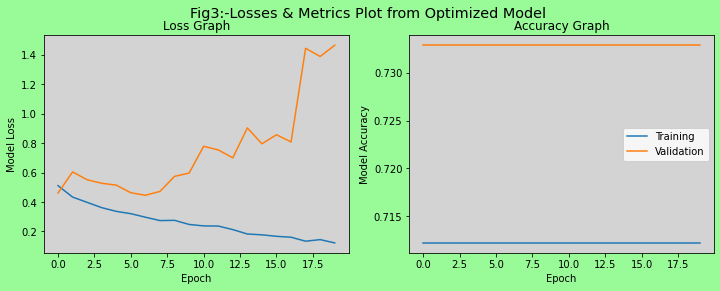

In [ ]:
# Plot the losses and metrics for the training and test data
# Defining plot with figure size,background color & plot title
f, ax = plt.subplots(1,2, figsize=(12,4))
f.suptitle("Fig3:-Losses & Metrics Plot from Optimized Model", fontsize="x-large")
f.patch.set_facecolor('palegreen')

# Ploting obtained loss metrics from model training
ax[0].plot(history.history['loss'], label='Training')
ax[0].plot(history.history['val_loss'], label='Validation')

# Setting axis,labels & plot color
ax[0].set_ylabel('Model Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_facecolor("lightgrey")
ax[0].set_title ('Loss Graph')

# Ploting obtained loss metrics from model training
ax[1].plot(history.history['accuracy'], label='Training')
ax[1].plot(history.history['val_accuracy'], label='Validation')

# Setting axis,labels & plot color
ax[1].set_ylabel('Model Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_facecolor("lightgrey")
ax[1].set_title ('Accuracy Graph')

plt.legend()

In [ ]:
# Evaluvating the Model Performance on the Test Data
model_test_loss = model.evaluate(val_ds,return_dict=True)
model_test_loss = model_test_loss['loss']
print("Loss from Model Evaluvation using Test Data : {}".format(model_test_loss))

22/22 [==============================] - 1s 36ms/step - loss: 1.4653 - accuracy: 0.7329
Loss from Model Evaluvation using Test Data : 1.465348243713379
